# Comparision between different versionsof HDy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import baycomp as bc
import glob
import os
from tqdm import tqdm

## Load results

In [9]:
results = pd.read_csv("results_1000bags.csv")
results.truth = results.truth.round()

## Summaries

In [13]:
mae_results = results.groupby(['method'])[['mae']].agg(['mean', 'median', 'count'])
mae_results

mae                 
            mean    median  count
method                           
AC      0.056985  0.031154  41000
HDy     0.054344  0.027964  41000
PAC     0.065082  0.042064  41000
pHDy    0.078728  0.050267  41000
rHDy    0.061091  0.040810  41000

In [11]:
results.groupby(['dataset', 'method'])[['mae']].agg(["mean", "median"]).unstack()

mae                                          \
                        mean                                           
method                    AC       HDy       PAC      pHDy      rHDy   
dataset                                                                
acute.a             0.003432  0.041700  0.015155  0.071582  0.029696   
acute.b             0.031226  0.062482  0.024057  0.053350  0.056600   
balance.1           0.026675  0.021902  0.050369  0.039185  0.025336   
balance.3           0.054846  0.048577  0.058513  0.077155  0.085887   
breast-cancer       0.019831  0.016109  0.011216  0.019701  0.035315   
cmc.1               0.075968  0.032291  0.075701  0.113200  0.052207   
cmc.2               0.045279  0.125387  0.041303  0.056375  0.084957   
cmc.3               0.055958  0.073460  0.141928  0.259832  0.089340   
coil                0.109946  0.170711  0.015617  0.199357  0.096517   
ctg.1               0.009585  0.008872  0.055827  0.030375  0.014659   
ctg.2               0.014107  0.010343  0.065679  0.023615  0.013811   
ctg.3               0.009800  0.005449  0.046937  0.052029  0.016236   
default_credit      0.010205  0.018232  0.041649  0.138848  0.048356   
diabetes            0.071972  0.032558  0.078289  0.073996  0.034325   
german              0.064069  0.062123  0.091318  0.056941  0.071155   
haberman            0.160002  0.216556  0.173729  0.405046  0.266903   
ionosphere          0.033945  0.029074  0.068450  0.027811  0.048711   
iris.1              0.002925  0.009334  0.011682  0.027009  0.024108   
iris.2              0.044226  0.071420  0.026439  0.093648  0.092264   
iris.3              0.021143  0.027304  0.066060  0.056026  0.045188   
lettersH            0.007558  0.013059  0.036926  0.019205  0.053292   
mammographic        0.055272  0.017419  0.019494  0.054203  0.022711   
normtrans           0.114176  0.086326  0.163096  0.113641  0.070020   
normwine.1          0.012189  0.014874  0.024235  0.035744  0.040143   
normwine.2          0.103240  0.010021  0.036301  0.034537  0.013792   
normwine.3          0.024000  0.029767  0.032129  0.035104  0.019085   
pageblocks.5        0.114972  0.036531  0.029640  0.039125  0.036908   
phoneme             0.008392  0.011262  0.047099  0.026454  0.034582   
semeion.8           0.074698  0.059719  0.103286  0.030264  0.077245   
sonar               0.178125  0.093176  0.133808  0.116608  0.099117   
spambase            0.016310  0.014099  0.018482  0.043309  0.027387   
spectf              0.157865  0.348304  0.229858  0.274479  0.335984   
tictactoe           0.042740  0.078173  0.087148  0.072891  0.087118   
transfusion         0.281248  0.098643  0.156971  0.119876  0.076166   
wdbc                0.037619  0.060097  0.035975  0.030735  0.020857   
wine-quality-red    0.073807  0.047147  0.058569  0.074027  0.062305   
wine-quality-white  0.025756  0.020193  0.092323  0.023055  0.022282   
wine.1              0.021339  0.015034  0.038023  0.056047  0.057116   
wine.2              0.087488  0.023735  0.052526  0.067101  0.022852   
wine.3              0.007223  0.015098  0.013356  0.058515  0.035598   
yeast               0.027227  0.051557  0.099196  0.027836  0.058579   

                                                                      
                      median                                          
method                    AC       HDy       PAC      pHDy      rHDy  
dataset                                                               
acute.a             0.003018  0.042865  0.014080  0.070686  0.026847  
acute.b             0.031058  0.061973  0.021497  0.048792  0.056854  
balance.1           0.023495  0.019757  0.045831  0.037600  0.022108  
balance.3           0.054283  0.050442  0.052812  0.077299  0.085564  
breast-cancer       0.019466  0.015282  0.010226  0.018976  0.035746  
cmc.1               0.072996  0.027849  0.061548  0.113475  0.046143  
cmc.2               0.037206  0.123641  0.035493  0.046699  0.079479  
cmc

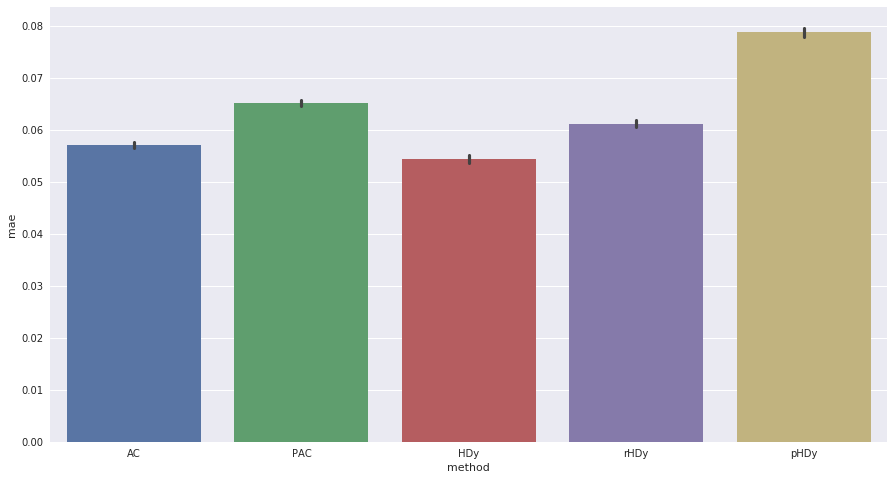

In [12]:
_, ax = plt.subplots(1,1,figsize=(15, 8))
sns.barplot(x="method", y="mae", data=results, 
            #order=["AC_linear", "AC_nonlinear", "AC_nonlinear_geometric", "EDX", "EDy_linear", "EDy_nonlinear", 
            #       "EDy_nonlinear_geometric", "HDX", "HDy_linear", "HDy_nonlinear", "HDy_nonlinear_geometric"]
           )